In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import operator as op
from functools import reduce


In [45]:
def ProbOverallFailure(probSingleFailure,N):
    #using the repetition code and mayority voting for error correcting
    #with N repetitions devoted to a single logical bit transmission
    #with each one of the single iterations having a probability of failure
    
    #returns the overall probability of failure
    
    sum = 0
    for i in range(int(N/2)+1,N+1):
        sum += ncr(N,i)*m.pow(probSingleFailure,i)*m.pow(1-probSingleFailure,N-i)
    
    return sum

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def NrepRequired(probSingleFailure,maxProbOverallFailure):
    #fixing the funciton attributes
    #returns the number of repetition bits required for:
    #probOverallFailure(probSingleFailure,NRepRequired) <= maxProbOverallFailure
    repBits = 1
    while(True):
        if maxProbOverallFailure >= ProbOverallFailure(probSingleFailure,repBits):
            break
        else:
            repBits += 1
    return repBits
        
    

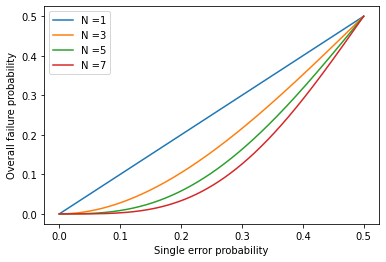

In [61]:
#Fixing N repbits, plotting ProbOverallFailure(ProbSingleFailure)

n = 3
N_repbits_max = 2*n +1
N_repbits_array = np.linspace(1,N_repbits_max,n+1,dtype=int)
N_probs = 10000
single_prob_array = np.linspace(0,0.5,N_probs)
overall_prob_array = np.zeros([N_probs,n+1])
for j in range(n+1):
    for i in range(N_probs):
        overall_prob_array[i,j] = ProbOverallFailure(single_prob_array[i],N_repbits_array[j])

    plt.plot(single_prob_array,overall_prob_array[:,j],label= "N =" + str(N_repbits_array[j]))

plt.xlabel("Single error probability")
plt.ylabel("Overall failure probability")
plt.legend()             
plt.show()


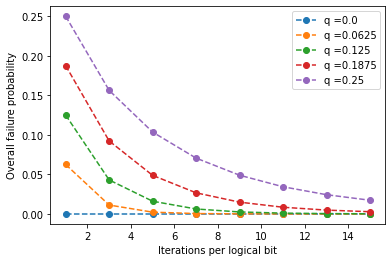

In [62]:
#Fixing ProbSingleFailure, plotting ProbOverallFailure(N repbits)

n = 7
N_repbits_max = 2*n +1
N_repbits_array = np.linspace(1,N_repbits_max,n+1,dtype=int)
N_probs = 5
single_prob_array = np.linspace(0,0.25,N_probs)
overall_prob_array = np.zeros([N_probs,n+1])

for i in range(N_probs):
    for j in range(n+1):
        overall_prob_array[i,j] = ProbOverallFailure(single_prob_array[i],N_repbits_array[j])

    plt.plot(N_repbits_array,overall_prob_array[i,:],"o--",label= "q =" + str(single_prob_array[i]))
    #plt.set_xscale("log")

plt.xlabel("Iterations per logical bit")
plt.ylabel("Overall failure probability")
plt.legend()             
plt.show()

0 / 4
1 / 4
2 / 4
3 / 4
4 / 4


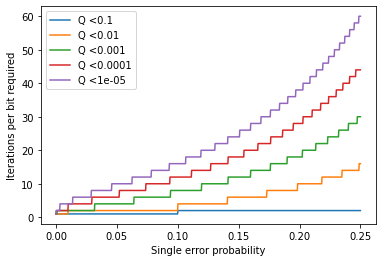

In [63]:
#Fixing ProbSingleFailure and maxProbOverallFailure, plotting N repbits required
min_maxOverallProb = 1E-1
max_maxOverallProb = 1E-5
N_maxProbs = 5
max_overall_prob_array = np.geomspace(min_maxOverallProb,max_maxOverallProb,N_maxProbs)

min_singleProb = 0
max_singleProb = 0.25
N_probs = 1000
single_prob_array = np.linspace(min_singleProb,max_singleProb,N_probs)


Nrepbits_array = np.zeros([N_probs,N_maxProbs])

for j in range(N_maxProbs):
    print(j,"/",N_maxProbs-1)
    for i in range(N_probs):
            Nrepbits_array[i,j] = NrepRequired(single_prob_array[i],max_overall_prob_array[j])

    plt.plot(single_prob_array,Nrepbits_array[:,j],label= "Q <" + str(max_overall_prob_array[j]))

plt.xlabel("Single error probability")
plt.ylabel("Iterations per bit required")
plt.legend()             
plt.show()